## **Data Quality Framework study**

This studied data is from **KPMG - Virtual Internship**:

**Given task at hand**: *"The client has asked our team to assess the quality of their data; as well as make recommendations on ways to clean the underlying data and mitigate these issues."*

This purpose of these set of codes are the look into a data gathered from Excel by saving as CSV that was given from a customer. The customer wants to see how this data can be interpreted. To move forward with the data, we made a study on the quality of the data to inform the customer on **data quality framework**.

# **Transaction Data**

### **Step 1 - Read the data**

We read the data and take a look at first 5 rows.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # For Github share, hide local file paths
warnings.filterwarnings('ignore')

transactions=pd.read_csv("data/transaction_id.csv", sep=';', encoding = "iso8859_9")
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1,2,2950,25.02.2017,YANLIŞ,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,21.05.2017,DOĞRU,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,16.10.2017,YANLIŞ,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,31.08.2017,YANLIŞ,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,1.10.2017,DOĞRU,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Step 2 - Fit the data to pandas dataframe**

As it can be seen from the above 5 rows of data, we have the following problems with the csv data saved from excel file:
- Caused by encoding, we have extra set of columns given as "Unnamed:", these columns are not required so all columns that have missing values are dropped.


In [3]:

#Clearing any Unnamed column caused by encoding from the data
transactions=transactions.dropna(how='all', axis='columns')

transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25.02.2017,YANLIŞ,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0
1,2,3,3120,21.05.2017,DOĞRU,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0
2,3,37,402,16.10.2017,YANLIŞ,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0
3,4,88,3135,31.08.2017,YANLIŞ,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",36145.0
4,5,78,787,1.10.2017,DOĞRU,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",42226.0


As we remove the undesired columns, we can actually take a look at the data and continue transforming this data to pandas:
- "product_first_sold_date" the date given here is excel's date numeric value and need to be converted in date value python can interpret
- "transaction_date" the date format given here can be fixed with python's date format
- "standard_cost" the value given in dolar needs to interpreted as float value, so we have to remove "$" string, remove any thousand seperator "." and finally replace decimal seperator "," with "."
- "list_price" similar to standart cost
- "online_order" the true and false given value here needs be replaced with 1 and 0

In [4]:

#Fixing excel related data integer to actual date
transactions['product_first_sold_date'] = pd.to_datetime(transactions['product_first_sold_date'], unit='D', origin='1899-12-30')
transactions['transaction_date']=pd.to_datetime(transactions['transaction_date'], format="%d.%m.%Y")

#Dolar sign removal and Float data type
transactions['standard_cost'] = transactions['standard_cost'].str.replace('$', '').str.replace(".","").str.replace(",",".").astype(float)
transactions['list_price'] = transactions['list_price'].str.replace(",",".").astype(float)

#Replace all Turkish True and False values with 1 and 0
transactions['online_order'] = transactions['online_order'].str.replace("YANLIŞ","0").str.replace("DOĞRU","1")

#Approved and Cancelled can be replaced with 1 and 0 as well
transactions['order_status'] = transactions['order_status'].str.replace("Cancelled","0").str.replace("Approved","1")

transactions.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0,1,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1,1,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0,1,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0,1,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1,1,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


## **Step 3 - The rows with missing values**

We can find all rows that includes missing value to inform the customer. This rows with missing valeus are saved to new file if the customer happens to want to see it.

Next, for EDA purposes, we remove all rows with missing values. Later on, for model analysis and prediction, the cells with missing value can be imputed to train a better model

In [5]:

tr_nan_values=transactions[transactions.isna().any(axis=1)]
print(transactions.isna().sum())
# tr_nan_values.to_csv("transactions_nan_values.csv")

# #For the Purpose of clean EDA, the rows with missing values are dropped, later on for a prediction model, these datas can be imputed more accurately for better model
# transactions=transactions.dropna()


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


## **Step 4 - Examine the Data**



#### Checking if any column includes a value out of ordinary, with group method of class type data

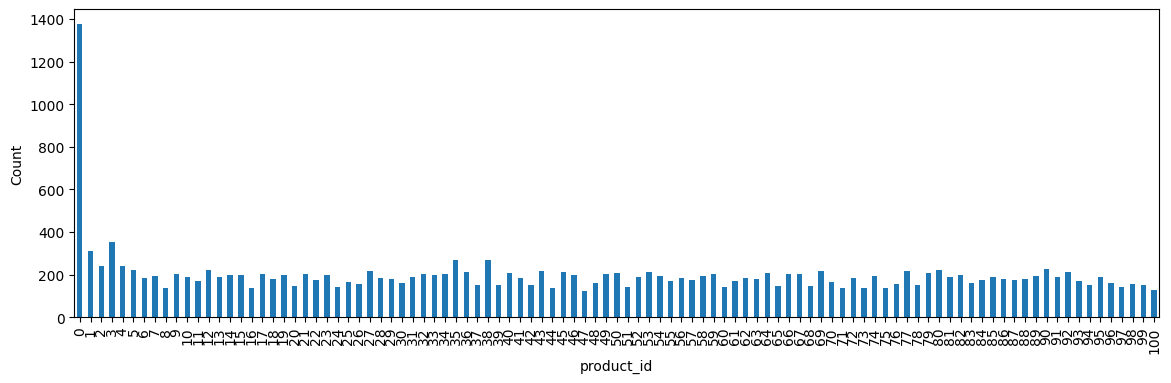

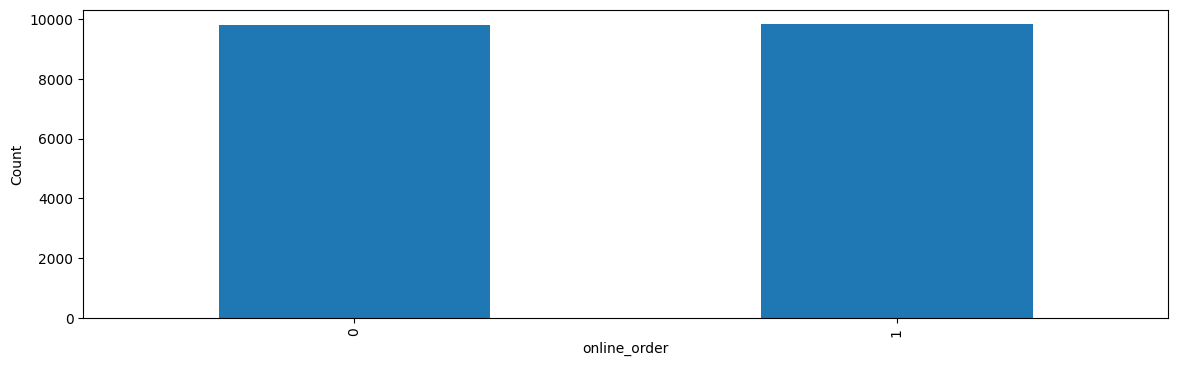

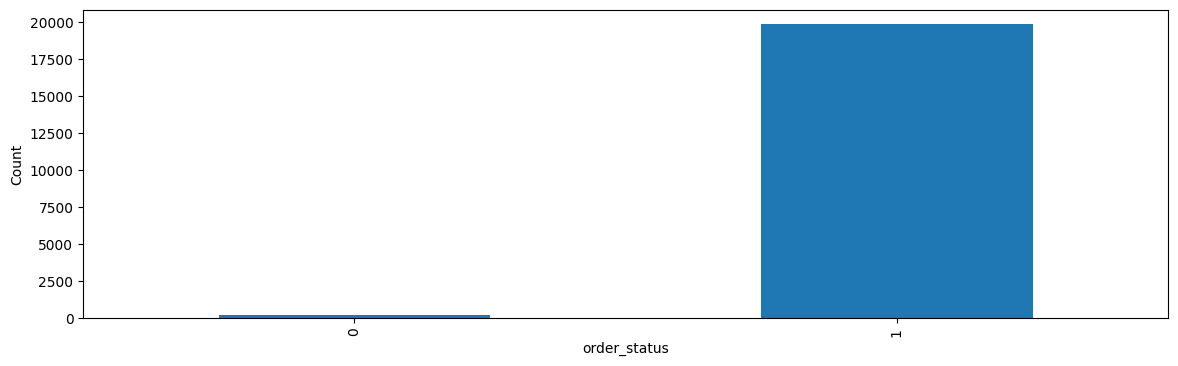

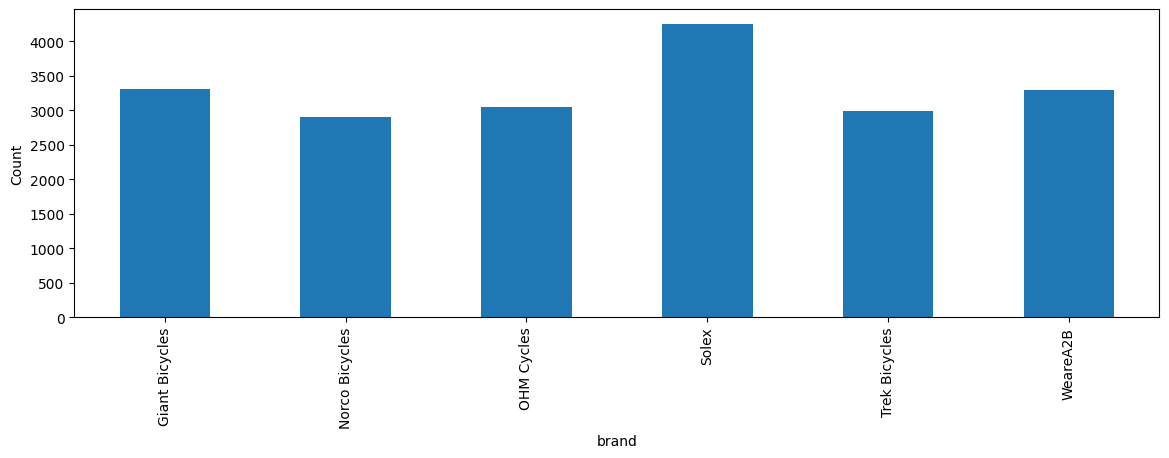

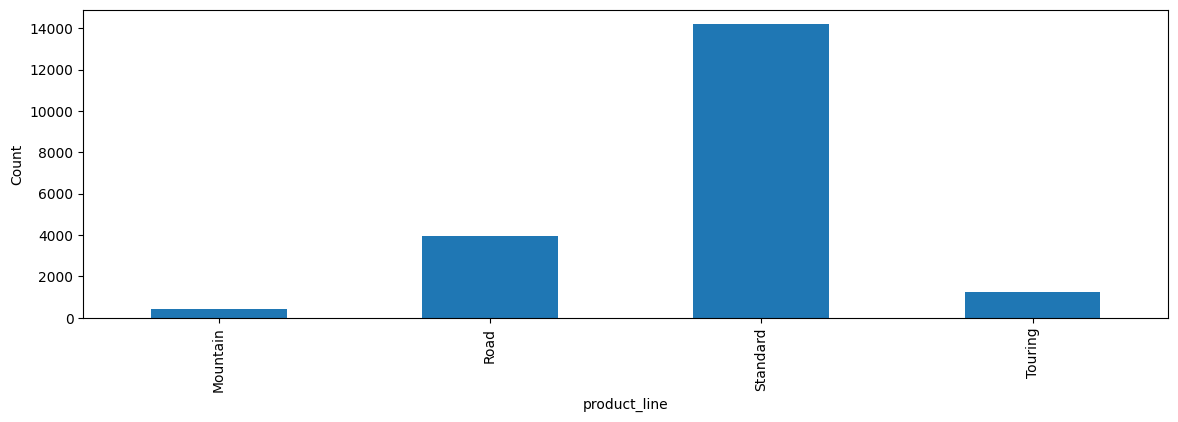

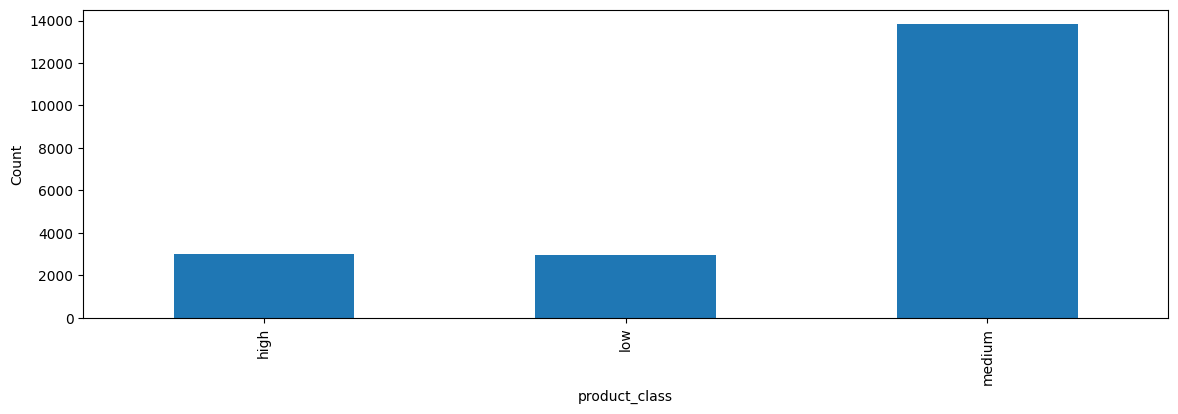

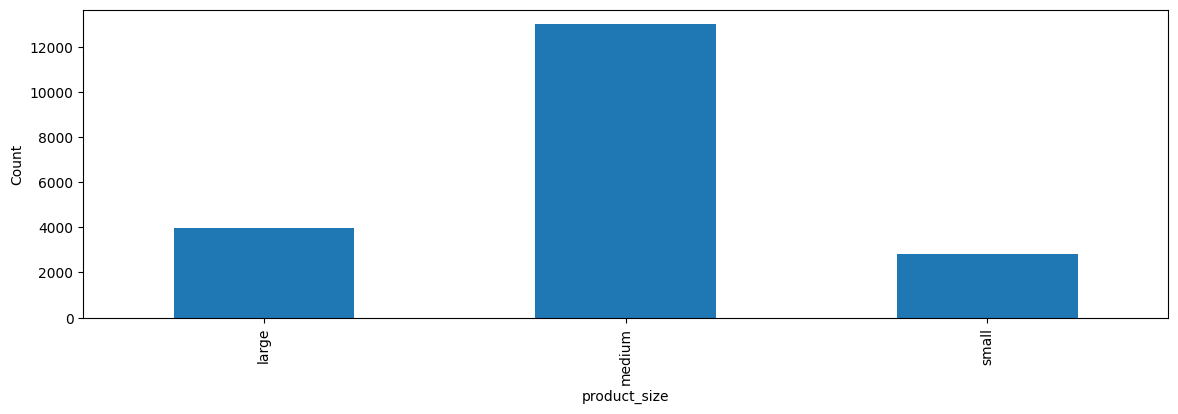

In [6]:
check_columns=["product_id","online_order","order_status","brand","product_line","product_class","product_size",]


#Checking if any column includes a value out of ordinary, if there is we can see invalid values from graphs.
for column in check_columns:
    group_plot=transactions.groupby([column]).size()
    group_plot.plot(kind='bar', ylabel='Count', xlabel=column, figsize=(14,4))
    plt.show()

#### Checking if any column includes a value out of ordinary, with min-max method for int, float and date type data

In [7]:
check_columns=["transaction_id","customer_id","transaction_date","list_price","standard_cost","product_first_sold_date"]
	
for column in check_columns:
    print("For ", column, "the min value =", transactions[column].min(), "  and the max value=", transactions[column].max())

For  transaction_id the min value = 1   and the max value= 20000
For  customer_id the min value = 1   and the max value= 5034
For  transaction_date the min value = 2017-01-01 00:00:00   and the max value= 2017-12-30 00:00:00
For  list_price the min value = 12.01   and the max value= 2091.47
For  standard_cost the min value = 7.21   and the max value= 1759.85
For  product_first_sold_date the min value = 1991-01-21 00:00:00   and the max value= 2016-12-06 00:00:00


#### **Checking for Duplicates**
The min and max value shows promising results. There is no minus value or value that seems to be out of order. 
Next we check if there are duplicate data in the data set.

After running our code to see duplicates, we find out there is no duplicate as well:

In [8]:
checkduplicates=transactions[transactions.duplicated()]
print(checkduplicates)

Empty DataFrame
Columns: [transaction_id, product_id, customer_id, transaction_date, online_order, order_status, brand, product_line, product_class, product_size, list_price, standard_cost, product_first_sold_date]
Index: []


# **New Customer List**

In [9]:

newcustomer=pd.read_csv("data/newcustomerlist.csv", sep=';', encoding = "iso8859_9")

#Clearing any Unnamed column caused by encoding from the data
newcustomer=newcustomer.dropna(how='all', axis='columns')

newcustomer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,"0,61","0,7625","0,953125","0,81015625",1,1,"1,71875"
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,"0,87","0,87","1,0875","0,924375",1,1,"1,71875"
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,"0,67","0,67","0,67","0,67",1,1,"1,71875"
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,"0,91","1,1375","1,1375","1,1375",4,4,"1,703125"
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,"1,1","1,1","1,375","1,375",4,4,"1,703125"


From data we have found sets of column that was used to do a desired action in excel for data generations. Assuming the function in these columns have done their duty after checking out their output in excel, right course of actions is to delete this columns

In [10]:
# transactions=transactions.drop(transactions.columns[transactions.columns.str.contains('Unnamed',case = False)],axis = 1)

newcustomer = newcustomer.loc[:, ~newcustomer.columns.str.contains('^Unnamed')]

# newcustomer.head()

In [11]:
newcustomer['DOB']=pd.to_datetime(newcustomer['DOB'], format="%Y-%m-%d")
newcustomer['Value'] = newcustomer['Value'].str.replace(",",".").astype(float)

newcustomer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [12]:
# customers_nan_values=newcustomer[newcustomer.isna().any(axis=1)]
# customers_nan_values.to_csv("customers_nan_values.csv")


As expected, the data that is gathered from users tends to includes higher amounts of missing values. Compared to our transactions example, here we won't be dropping any rows, as any information on the customer is useful regardless on if we have missing data or not. Here what matters is what we have rather than what we miss.

In [13]:
checkduplicates=newcustomer[newcustomer.duplicated()]
print(checkduplicates)

Empty DataFrame
Columns: [first_name, last_name, gender, past_3_years_bike_related_purchases, DOB, job_title, job_industry_category, wealth_segment, deceased_indicator, owns_car, tenure, address, postcode, state, country, property_valuation, Rank, Value]
Index: []


#### Checking for any invalid class data

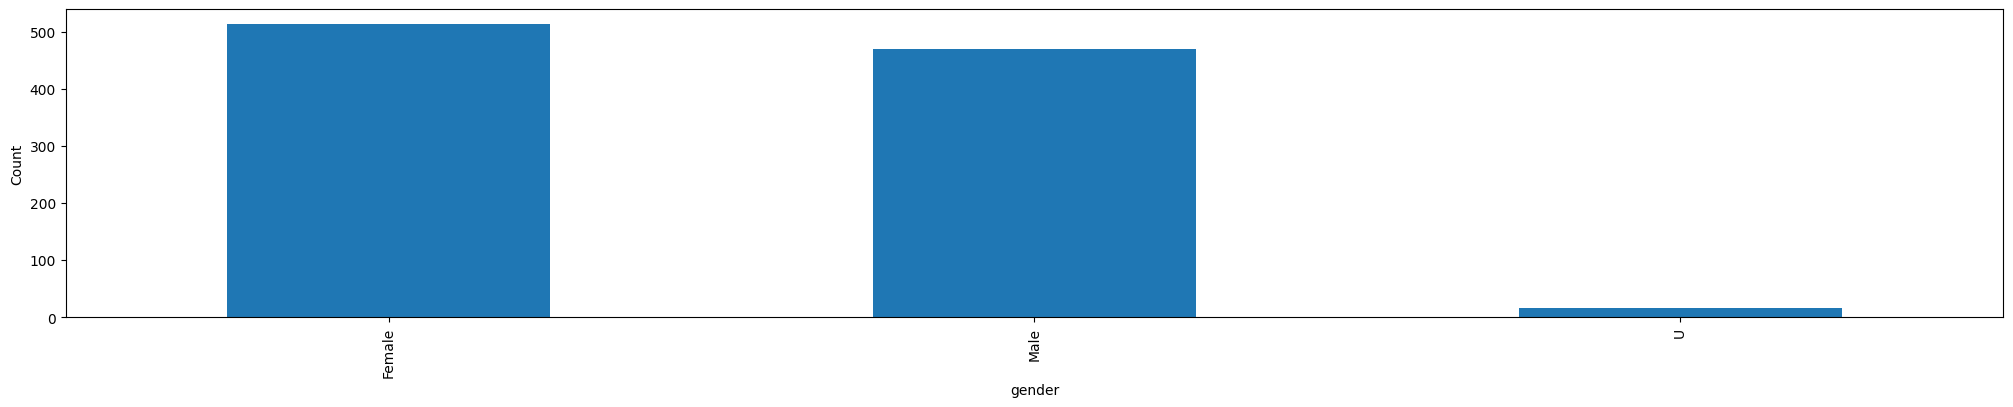

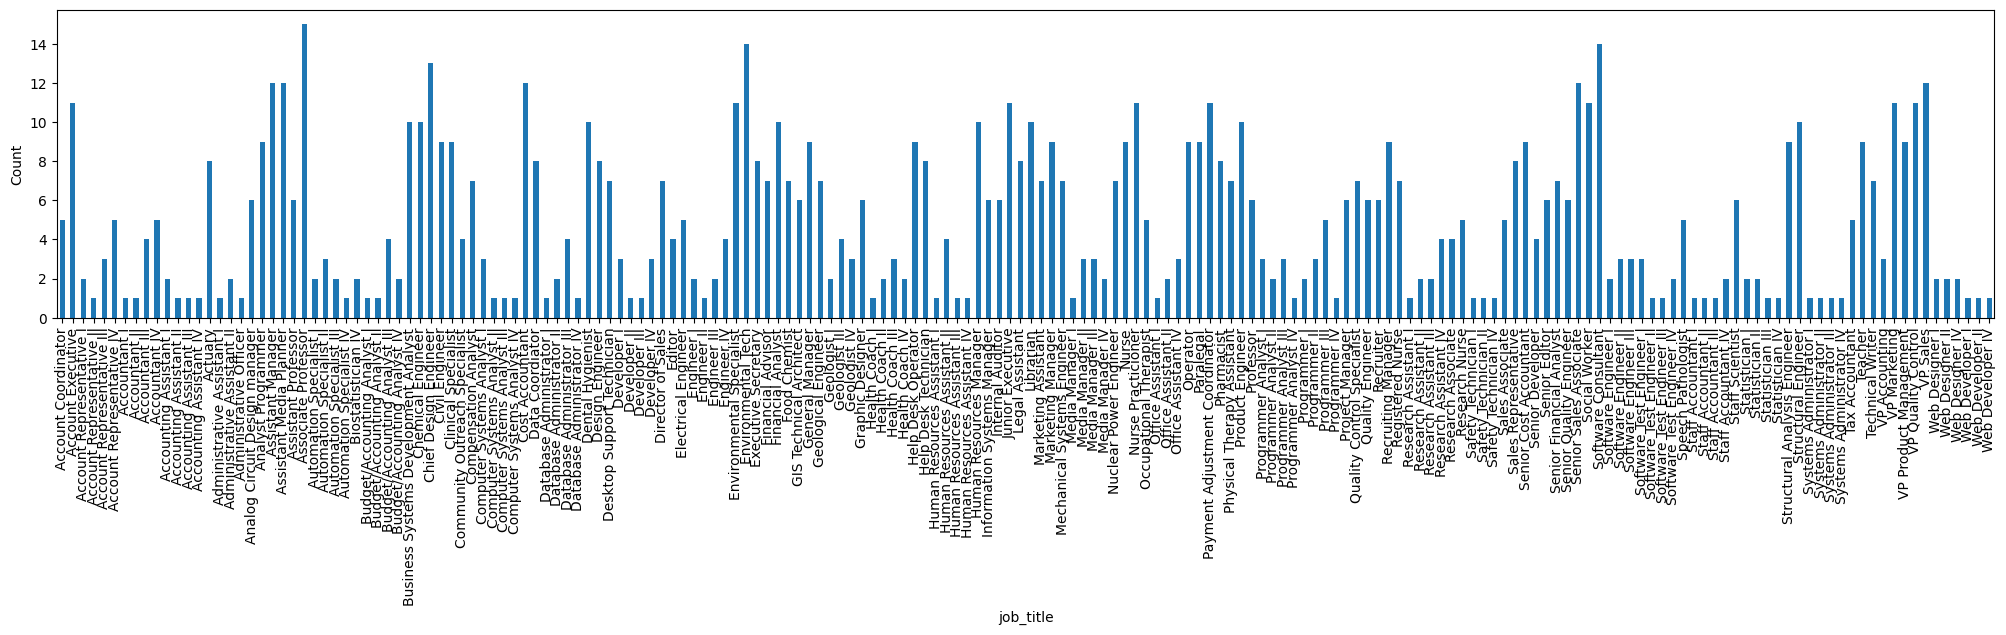

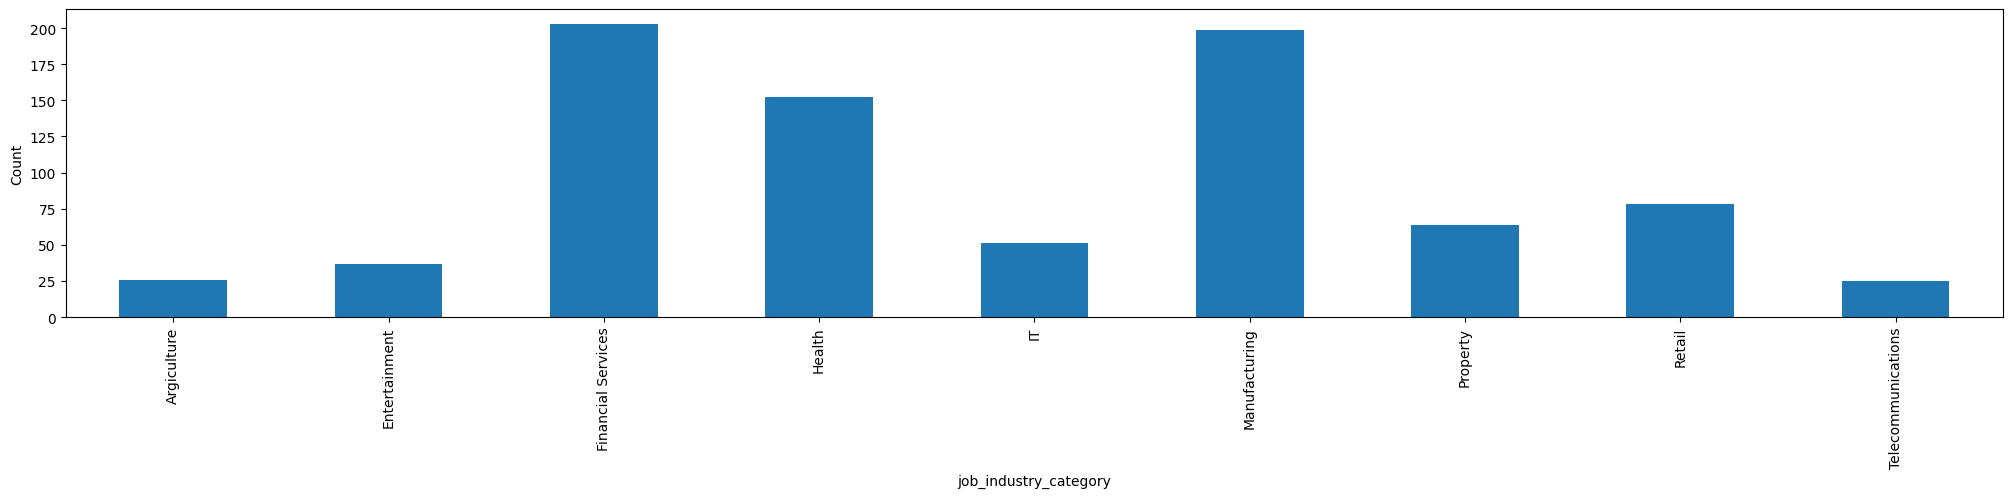

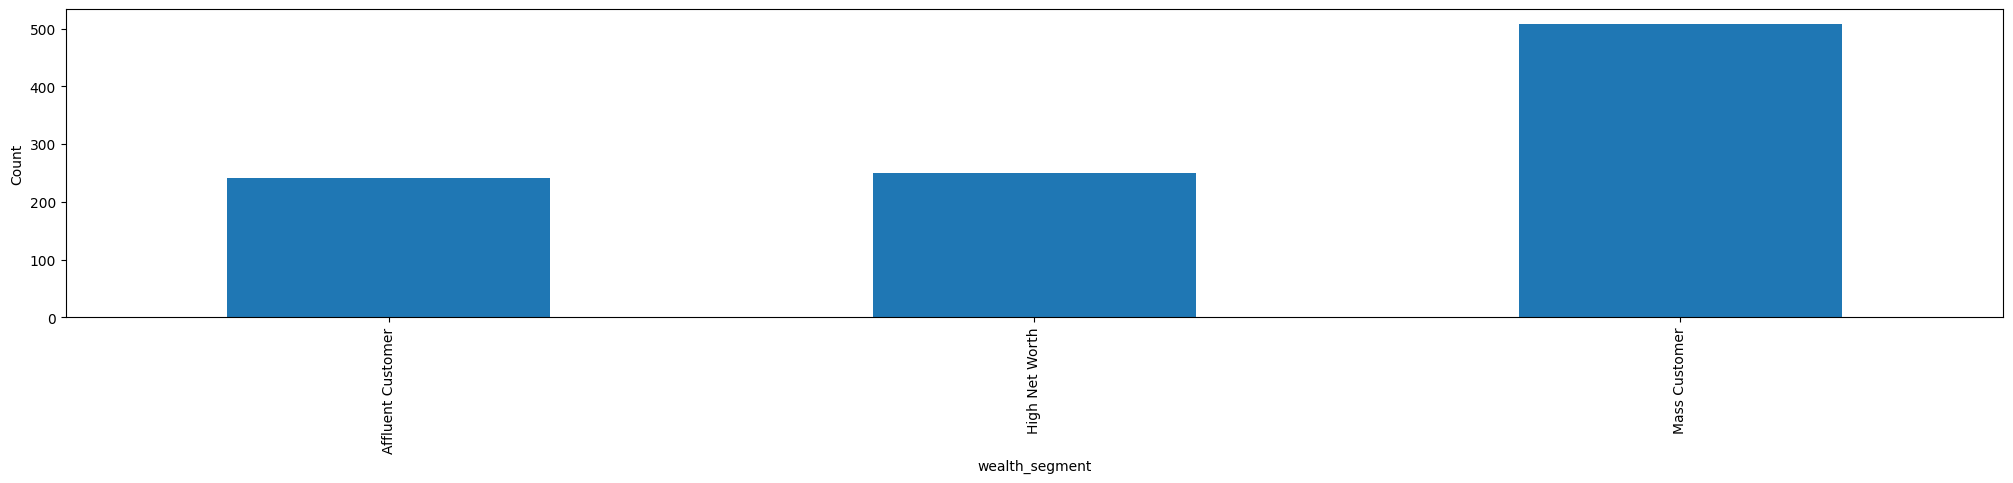

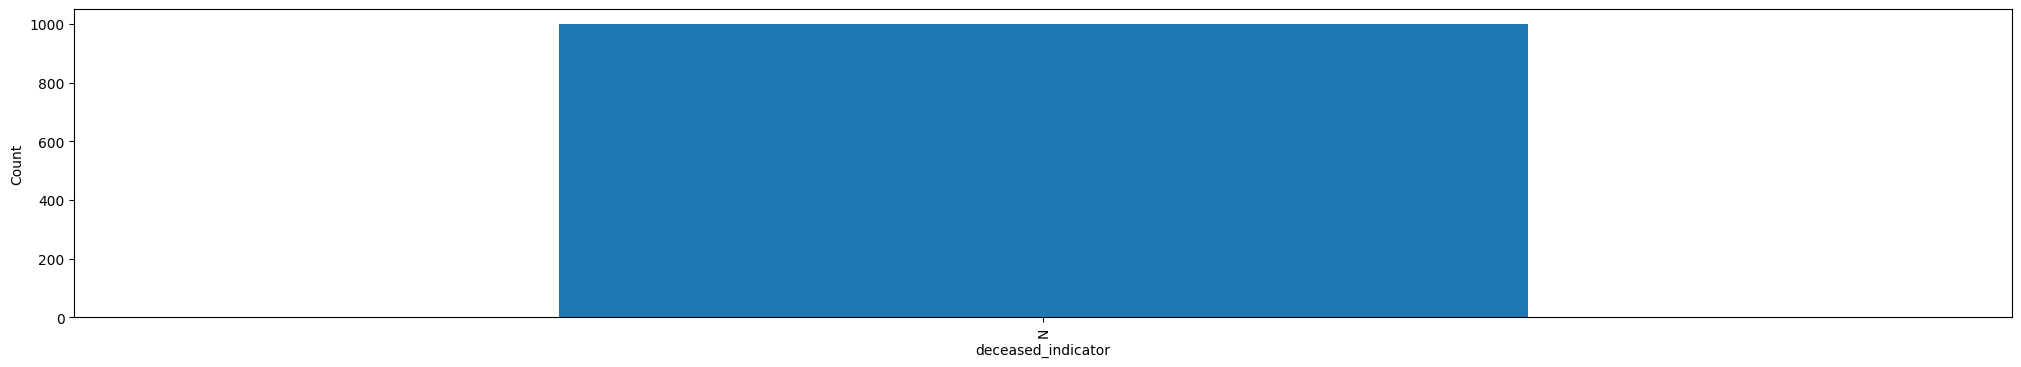

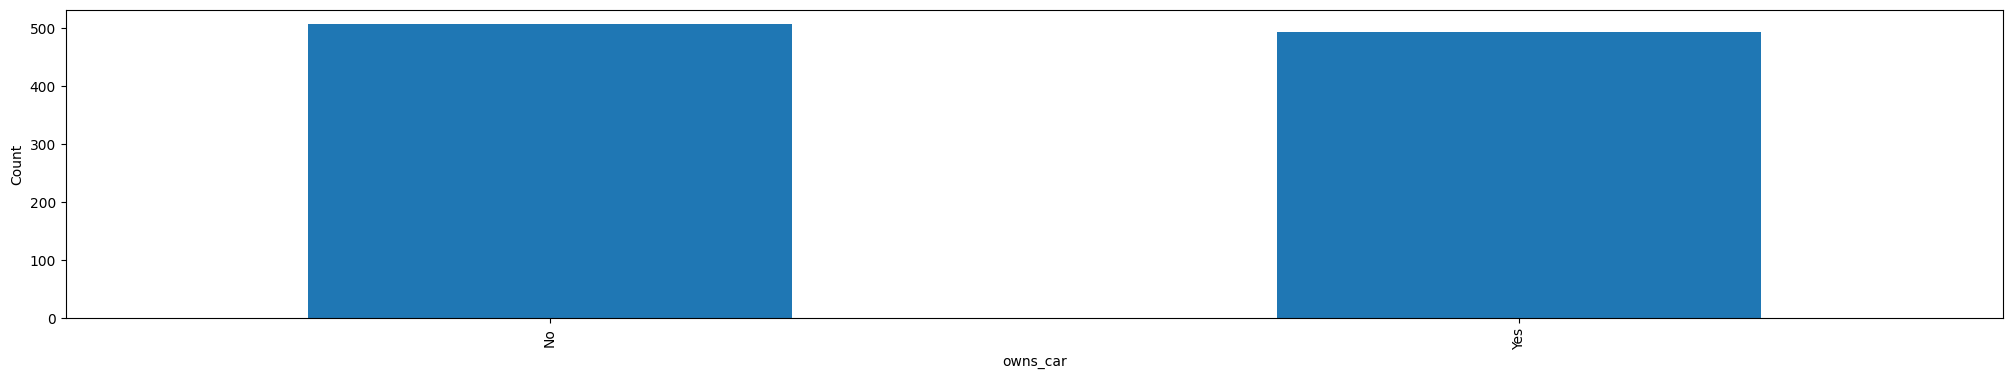

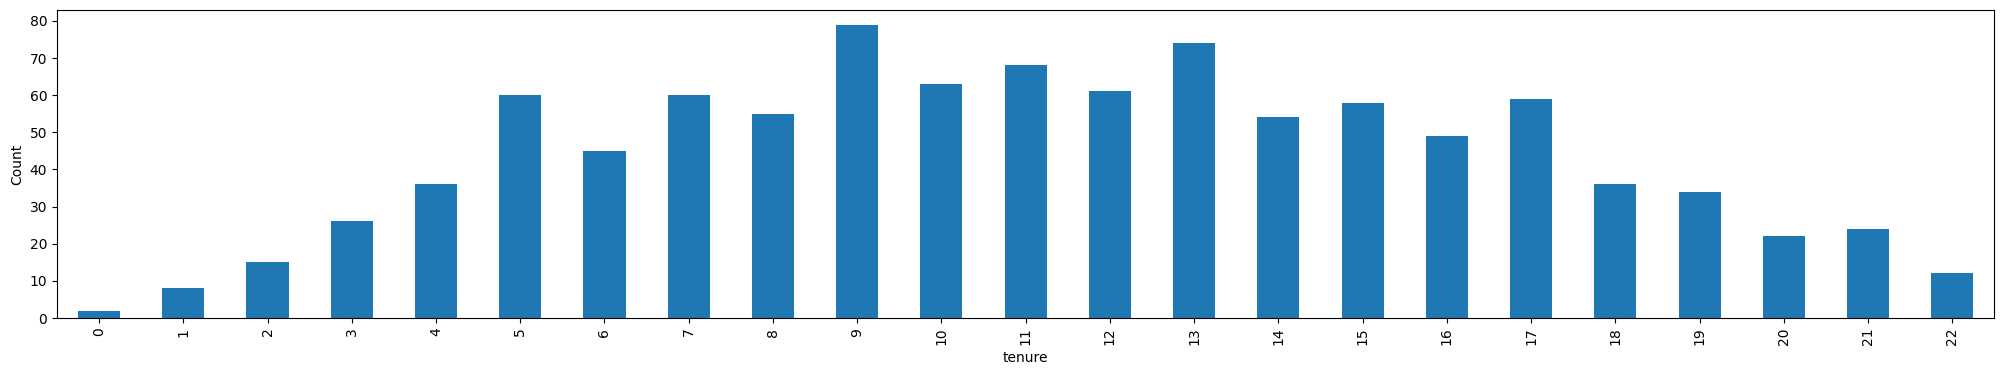

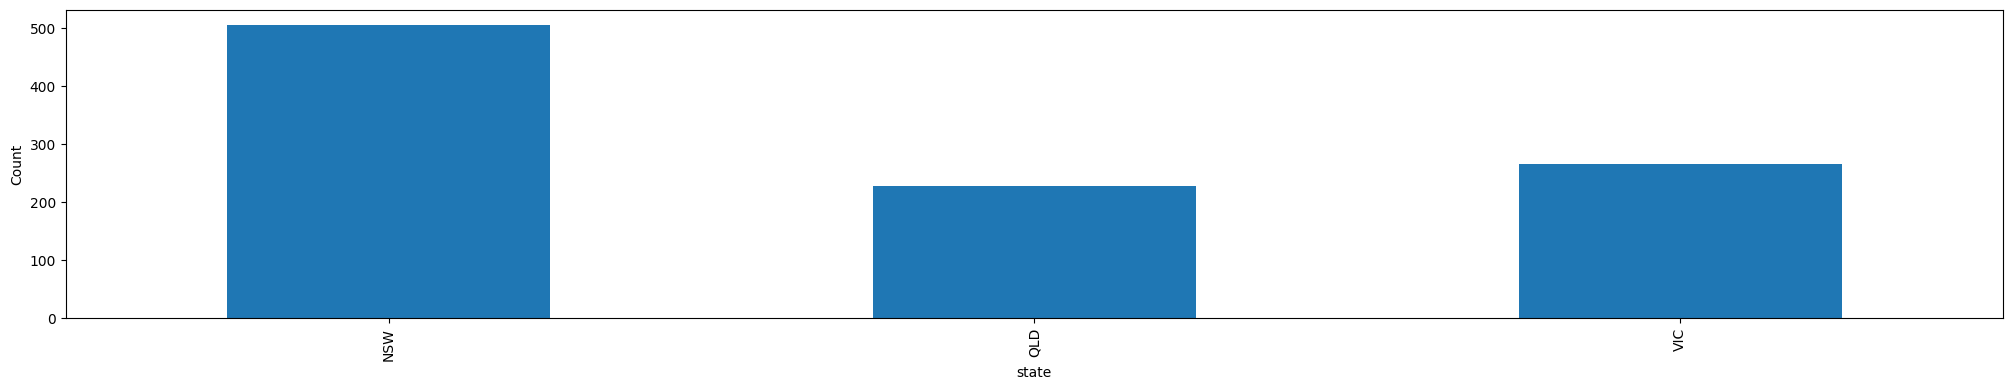

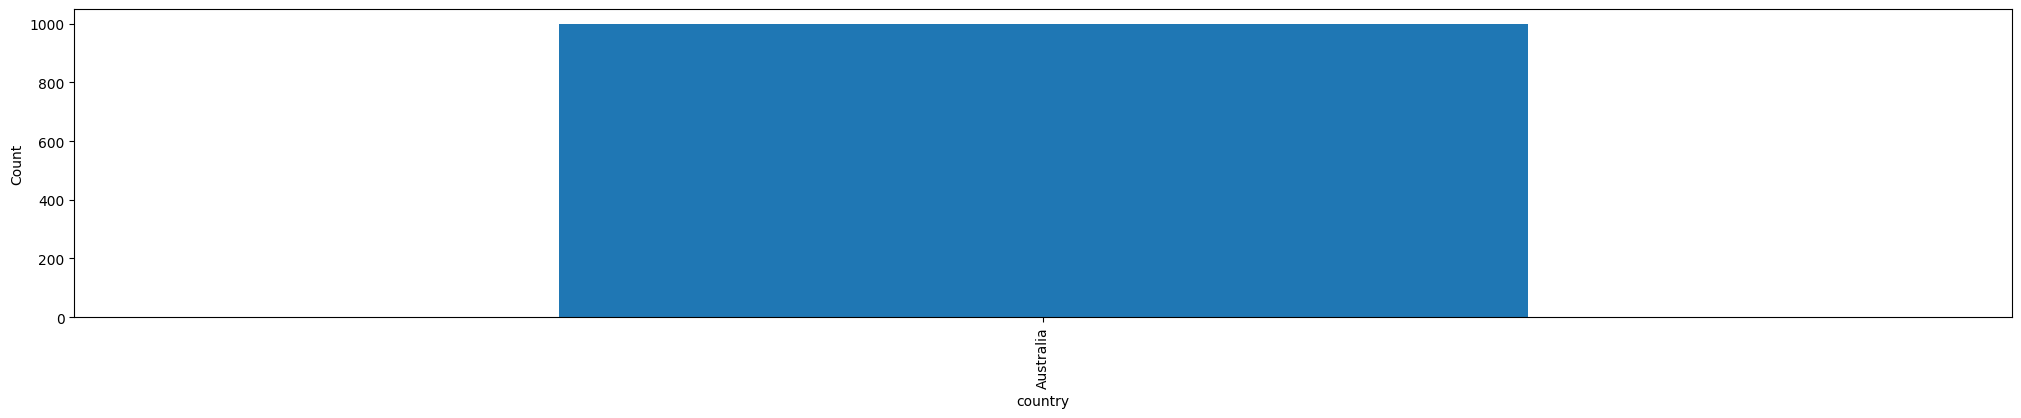

In [14]:
check_columns=["gender","job_title","job_industry_category","wealth_segment","deceased_indicator","owns_car","tenure","state","country"]


#Checking if any column includes a value out of ordinary, if there is we can see invalid values from graphs.
for column in check_columns:
    group_plot=newcustomer.groupby([column]).size()
    group_plot.plot(kind='bar', ylabel='Count', xlabel=column, figsize=(25,4))
    plt.show()

#### Checking for any invalid integer or float data

In [15]:
check_columns=["past_3_years_bike_related_purchases","property_valuation","Rank","Value"]
	
for column in check_columns:
    print("For ", column, "the min value =", newcustomer[column].min(), "  and the max value=", newcustomer[column].max())

For  past_3_years_bike_related_purchases the min value = 0   and the max value= 99
For  property_valuation the min value = 1   and the max value= 9
For  Rank the min value = 1   and the max value= 1000
For  Value the min value = 0.34   and the max value= 1.71875


This data is investigated as well, moving on the next one

# **Customer Demographic**

In [16]:
customerdemographic=pd.read_csv("data/customerdemographic.csv", sep=';', encoding = "iso8859_9")

#Clearing any Unnamed column caused by encoding from the data
customerdemographic=customerdemographic.dropna(how='all', axis='columns')

#Column "default" includes data that is either corrupted or encoded in a way that is alien to us, so it is discarded.
customerdemographic=customerdemographic.drop(["default"],axis=1)

#Changing str Date to pandas date time
customerdemographic['DOB']=pd.to_datetime(customerdemographic['DOB'], format="%Y-%m-%d")

customerdemographic.head()


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [17]:
print(customerdemographic["gender"].unique())

['F' 'Male' 'Female' 'U' 'Femal' 'M']


#### As it can be see from above output, we have to deal with gender related class values. The value "F" is obviously present Female but the dataset approaches this value as a new unique value. In order to fix it, we must replace all these duplicate values in one format

In [18]:
customerdemographic["gender"]=customerdemographic["gender"].replace(to_replace=["F","Femal"], value='Female').replace(to_replace='M', value='Male')

print(customerdemographic["gender"].unique())
#Checking for uniquues in gender again:

['Female' 'Male' 'U']


In [19]:
check_columns=["DOB","customer_id","past_3_years_bike_related_purchases","tenure"]
print(type(customerdemographic["DOB"][1]))
for column in check_columns:
    print("For ", column, "the min value =", customerdemographic[column].min(), "  and the max value=", customerdemographic[column].max())

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
For  DOB the min value = 1843-12-21 00:00:00   and the max value= 2002-03-11 00:00:00
For  customer_id the min value = 1   and the max value= 4000
For  past_3_years_bike_related_purchases the min value = 0   and the max value= 99
For  tenure the min value = 1.0   and the max value= 22.0


We can see one of our customer birthdate is **given as 1843, this value is too high to be valid** as no person that old is alive

In [20]:
print(customerdemographic["DOB"].sort_values().head())



#As it can be seen 1843 is value is only value outside the accepted limits. To replace this data, lets use average value in terms of age
customerdemographic["DOB"].loc[(customerdemographic["DOB"]=="1843-12-21 00:00:00")]=customerdemographic["DOB"].mean()


33     1843-12-21
719    1931-10-23
1091   1935-08-22
3409   1940-09-22
2412   1943-08-11
Name: DOB, dtype: datetime64[ns]


# **Customer Adress**

In [21]:


customeradress=pd.read_csv("data/customeradress.csv", sep=';', encoding = "iso8859_9")

#Clearing any Unnamed column caused by encoding from the data
customeradress=customeradress.dropna(how='all', axis='columns')

customeradress["state"]=customeradress["state"].str.replace("New South Wales","NSW").replace("Victoria", "VIC")

customeradress.head()


,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [22]:
print(customeradress["state"].unique())

['NSW' 'QLD' 'VIC']
